#### Linear Regression
##### A simple approach for supervised learning and a useful too for predicting a quantitative response.
##### The lab is adapted from the book An Introduction to Statistical Learning, With Applications in Python (ISLP).

##### We import our standard libraries at the top level

In [1]:
!pip install numpy pandas matplotlib statsmodels

In [2]:
!pip install ISLP

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
summarize, 
poly)

In [4]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_1',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__pandas',
 '__session__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'dataframe_columns',
 'dataframe_hash',
 'dtypes_str',
 'exit',
 'get_dataframes',
 'get_ipython',
 'getpass',
 'hashlib',
 'import_pandas_safely',
 'is_data_frame',
 'json',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [5]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [6]:
A.sum()

19

##### we will construct model matrices( also called design matrices) using the ModelSpec() transform from ISLP.models
##### A design matrix is a way to represent the predictors (features) in a dataset for use in linear models. It turns categorical variables into dummy (indicator) variables and ensures numerical variables are formatted correctly.

##### We will use the Boston housing data set which is contained in the ISLP package
##### The Boston dataset records medv(median house value) for 506 neighborhoods around Boston
##### We will build a regression model to predict medv using 13 predictors such as rmvar  (average number of rooms per house), age (proportion of owner-occupied units built prior to 1940), and lstat (percent of households with low socioeconomic status). 

In [7]:
Boston = load_data("Boston")
Boston.columns
                   

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
X = pd.DataFrame({"intercept": np.ones(Boston.shape[0]),
                 "lstat": Boston["lstat"]})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [9]:
#We extract the response and fit the model
y= Boston["medv"]
model= sm.OLS(y, X) #does not fit the model; it specifies the model
results= model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [10]:
design= MS(["lstat"])
design= design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [11]:
design= MS(["lstat"])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [12]:
#summary of the fit
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        11:12:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#the fitted coefficients can also be retrieved as the params attribute of the results
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [14]:
#get_prediction() method can be used to obtain predictions and produce confidence intervals and prediction intervals for the preddiction of medv for given values of lstat
#create a new df containing only lstat with the values for this variable at which we wish to make predictions
new_df= pd.DataFrame({"lstat": [5, 10, 15]})
newX= design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [15]:
#we then compute the predictions at newX and view them by extracting the preddicted_mean attribute
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [16]:
#we can produce confidence intervals for the predicted values
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [17]:
#prediction intervals are computed by setting obs=True
new_predictions.conf_int(obs=True, alpha= 0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

C:\Users\colli\AppData\Local\Temp\ipykernel_30108\345474809.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\colli\AppData\Local\Temp\ipykernel_30108\345474809.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


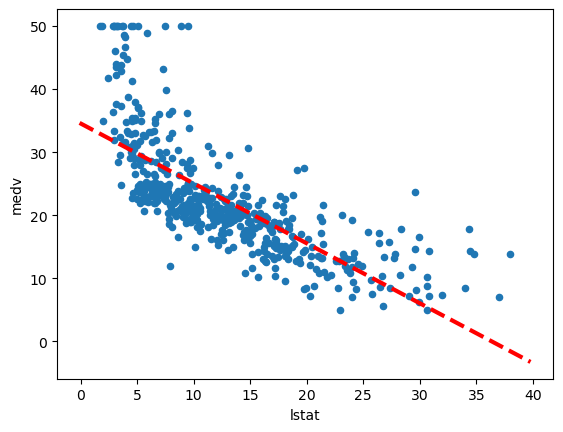

In [18]:
#next we will scatter plot medv and lstat and add the regression line to the resulting plot
def abline(ax, b, m, *args, **kwargs):
    #add a line with slope m and intercept b to ax
    xlim= ax.get_xlim()
    ylim= [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax= Boston.plot.scatter("lstat", "medv")
abline(ax,
      results.params[0],
      results.params[1],
      "r--",
      linewidth=3)

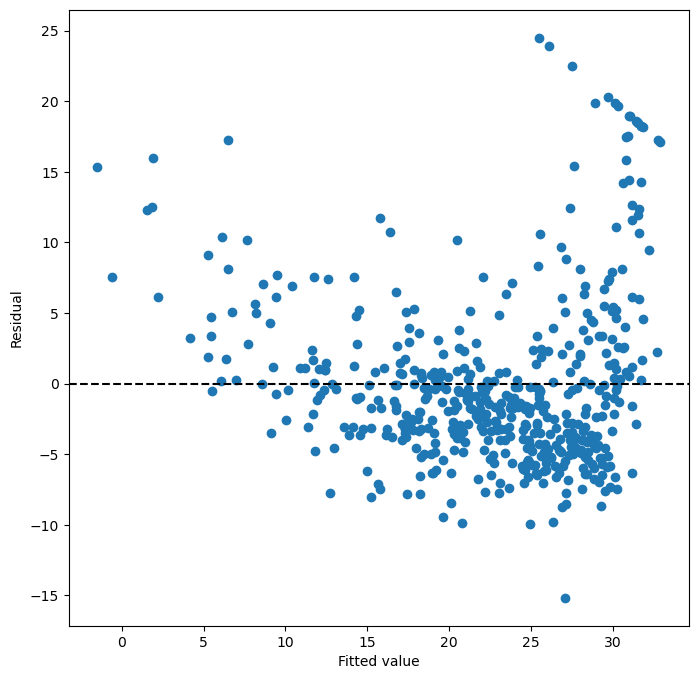

In [19]:
#we can find the fitted values and residuals of the fit as attributes of the results object
ax= subplots(figsize= (8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c= "k", ls= "--")

374

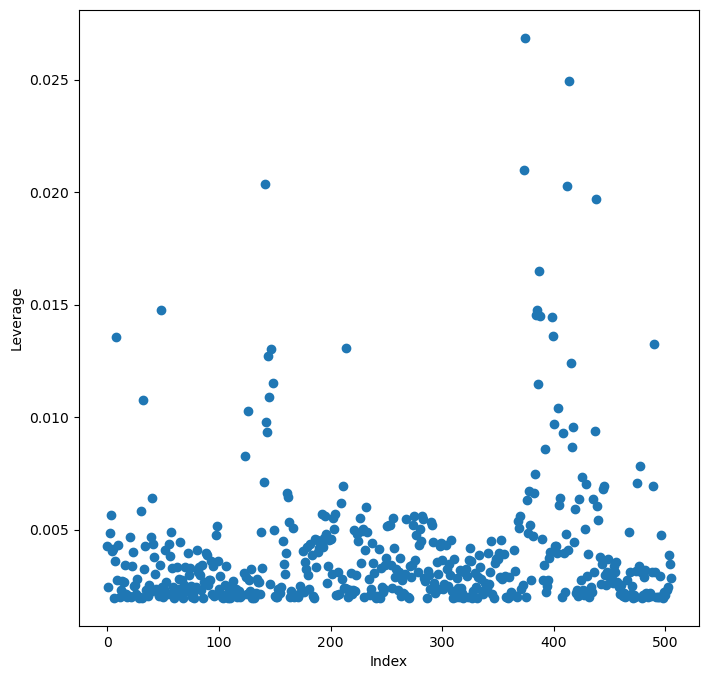

In [20]:
#Leverage stat can be computed for any number of predictors using the hat_matrix_diag attribute of the value returned by the get_influence()
infl= results.get_influence()
ax= subplots(figsize= (8,8))[1]
ax.scatter(np.arange(X.shape[0]) , infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)
#Leverage (hat_matrix_diag) measures how "unusual" an observation is in predictor space (high leverage = potential outlier).

## Multiple Linear Regression
##### In order to fit a mlr model using least squares, we again use the ModelSpec() transform to construct the required model matrix and response


In [21]:
X= MS(["lstat", "age"]).fit_transform(Boston)
model1= sm.OLS(y, X)
results1= model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [22]:
#Let us use all the predictors
terms= Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [23]:
X= MS(terms).fit_transform(Boston)
model= sm.OLS(y, X)
results= model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [24]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [25]:
minus_age= Boston.columns.drop(["medv", "age"])
Xma= MS(minus_age).fit_transform(Boston)
model1= sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [26]:
results.rsquared

0.7343070437613077

In [27]:
np.sqrt(results.scale) #gives us the RSE

4.798034335596366

### Multivariate Goodness of Fit
#### We will compute the VIFs in our multiple regression fit to assess the effect of collinearity in the model matrix


In [28]:
vals= [VIF(X, i) for i in range(1, X.shape[1])]
vif= pd.DataFrame({"vif": vals}, index= X.columns[1:])
vif
#VIF() takes 2 arguments: dataframe or array and a variable column index

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [29]:
#vals= []
#for i in range(1, X.values.shape[1]):
 #   vals.append(VIF(X.values, i))
#X.values: Converts a Pandas DataFrame to a NumPy array for numerical operations.

#### Interaction Terms
##### You can include interaction terms in a linear model including a tuple ("lstat", "age") that tells the model matrix builder to include an interaction term between lstat and age.

In [30]:
X = MS(["lstat",
       "age",
       ("lstat", "age")]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


#### Non-linear Transformations of the Predictors


In [31]:
X = MS([poly("lstat", degree=2), "age"]).fit_transform(Boston)
model3= sm.OLS(y, X)
results3= model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


##### We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [32]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


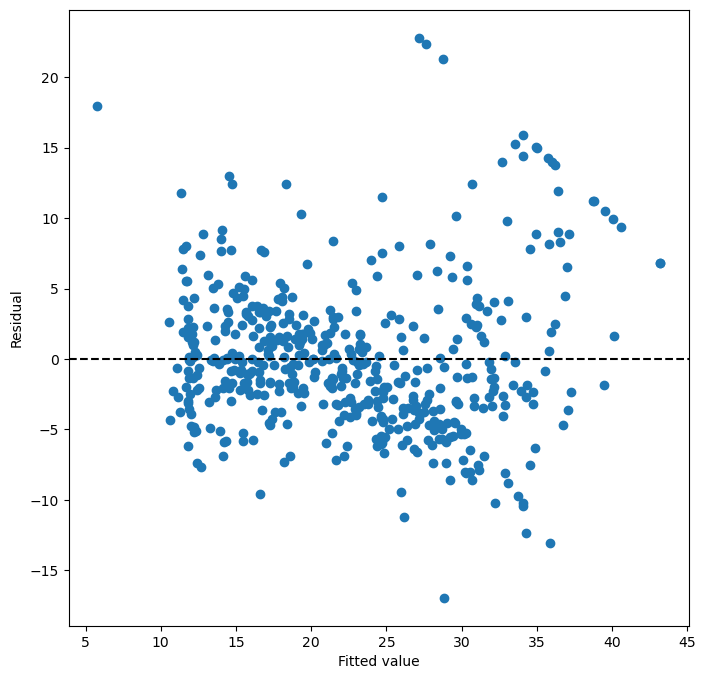

In [33]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls= "--")

#### Qualitative Predictors
##### Here we use the Carseats data, which is included in the ISLP package. We will attempt to predict Sales(child car seat sales) in 400 locations based on a number of predictors

In [34]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
#fit a multiple regression model that includes some interaction terms
allvars = list(Carseats.columns.drop("Sales"))
y = Carseats["Sales"]
final = allvars + [("Income", "Advertising"),
                  ("Price", "Age")]
X = MS(final).fit_transform(Carseats)
model= sm.OLS(y, X)
summarize(model.fit())
#coefficient  for ShelveLoc[Good] in the regression output is positive indicating that a good shelving location is associated with high sales(relative to a bad location)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


#### The question involves the use of simple linear regression on the Auto data set.
##### Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:
* Is there a relationship between the predictor and the response?
* How strong is the relationship between the predictor and the response?
* Is the relationship between the predictor and the response positive or negative?
* What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidensóce and prediction intervals


In [36]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [38]:
y= Auto["mpg"]
design = MS(["horsepower"])
X = design.fit_transform(Auto)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [39]:
#0.6 means that 60 % of the variance in the response variable is explained by the predictor(s) in the model >0.7 implies strong relationship
#Caveat: Rsquared increases with more predictors. Use Adjusted Rsquares if you have multiple predictors
results.rsquared

0.6059482578894348

In [40]:
# RSE : The average deviation of observed values from the model's predicted value is 4.9 units
#Lower RSE = Better fit
np.sqrt(results.scale)


4.90575691954594

In [41]:
new_df = pd.DataFrame({"horsepower": [98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [42]:
newPredictions= results.get_prediction(newX)
newPredictions.predicted_mean

array([24.46707715])

In [43]:
#associated 95% CI and PI
newPredictions.conf_int(alpha= 0.05)

array([[23.97307896, 24.96107534]])

In [44]:
#Predicted intervals
newPredictions.conf_int(obs= True, alpha= 0.05)

array([[14.80939607, 34.12475823]])

##### Plot the response and the predictor in a new set of axes ax. use the ax.axline() or abline() method to display the least squares regression line



C:\Users\colli\AppData\Local\Temp\ipykernel_30108\3070442030.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\colli\AppData\Local\Temp\ipykernel_30108\3070442030.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


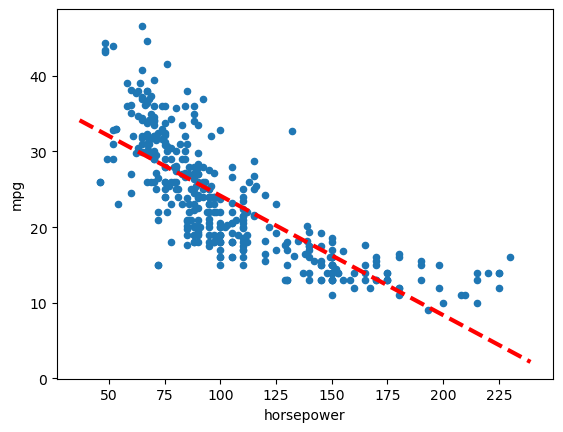

In [45]:
def abline(ax, b, m, *args, **kwargs):
    xlim= ax.get_xlim()
    ylim= [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax= Auto.plot.scatter("horsepower", "mpg")
abline(ax,
      results.params[0],
      results.params[1],
      "r--",
      linewidth=3)


#ax = subplots(figsize=(8,8))[1]
#ax.scatter(Auto["horsepower"], Auto["mpg"])
#ax.set_xlabel("horsepower")
#ax.set_ylabel("mpg")
#ax.axline((0,0), slope = 1, c = "r", ls= "--") #define the axline with point and slope parameters

##### Produce some diagnostic plots of the least square regression fit. comment on any problems you see with the fit

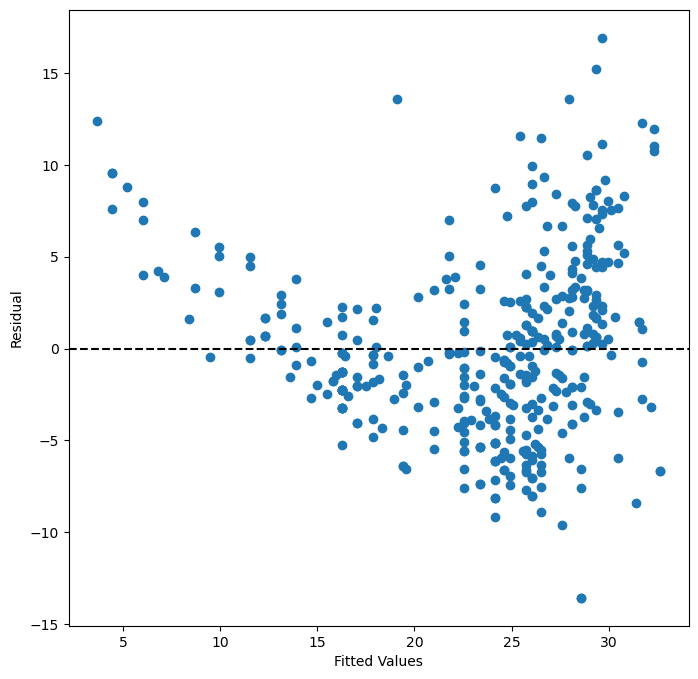

In [46]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residual")
ax.axhline(0, c= "k", ls= "--")

#####  This question involves the use of multiple linear regression on the Auto data set.
#####  (a) Produce a scatterplot matrix which includes all of the variables in the data set.(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.
##### (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. comment on the output. For instance:
##### i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
##### ii. Which predictors appear to have a statistically significant relationship to the response?
##### iii What does the coefficient for the year variable suggest?

 

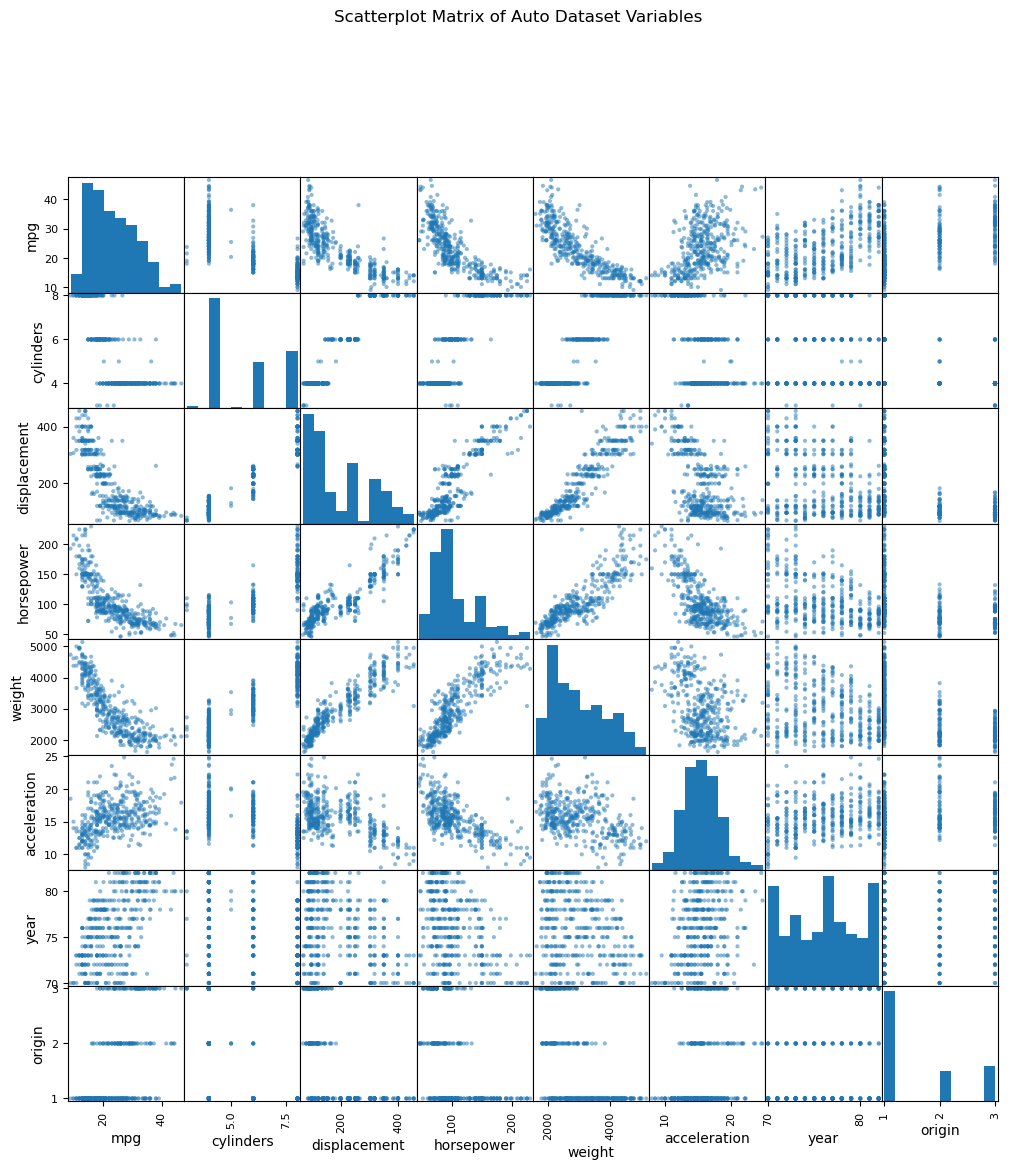

In [47]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(Auto, figsize=(12,12))
plt.suptitle("Scatterplot Matrix of Auto Dataset Variables", y = 1.02)
plt.show()

In [48]:
correlation_matrix= Auto.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [49]:
y= Auto["mpg"]
x_column=list(Auto.columns.drop("mpg"))
X= MS(x_column).fit_transform(Auto)
model= sm.OLS(y,X)
results= model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [50]:
from sklearn.preprocessing import StandardScaler
y= Auto["mpg"]
x_columns= list(Auto.columns.drop("mpg"))
#Scale then add constant
scaler = StandardScaler()
X_scaled= scaler.fit_transform(Auto[x_columns])
X= sm.add_constant(X_scaled) #Must add constant after scaling
model = sm.OLS(y, X)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        11:13:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.168    139.498      0.000      23.115      23.776
x1            -0.8405      0.551     -1.526      0.128      -1.923       0.242
x2             2.0793      0.785      2.647      0.008       0.535       3.624
x3            -0.6516      0.530     -1.230      0.220      -1.694       0.390
x4            -5.4921      0.553     -9.929      0.000      -6.580      -4.404
x5             0.2220      0.272      0.815      0.415      -0.313       0.758
x6             2.7621      0.188     14.729      0.000       2.393       3.131
x7             1.1473      0.224      5.127      0.000       0.707       1.587
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
import statsmodels.formula.api as smf
scaler= StandardScaler()
x_columns= list(Auto.columns.drop("mpg"))
Auto_scaled = Auto.copy()
Auto_scaled[x_columns] = scaler.fit_transform(Auto[x_columns])
#create a formula string
formula = "mpg~"+ "+".join(x_columns)
#fit using formula API
model = smf.ols(formula = formula, data=Auto_scaled).fit()
#summarize(model)
anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


##### Produce some diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unsually large outliers?
##### Does the leverage plot identify any observations with unsually high leverage

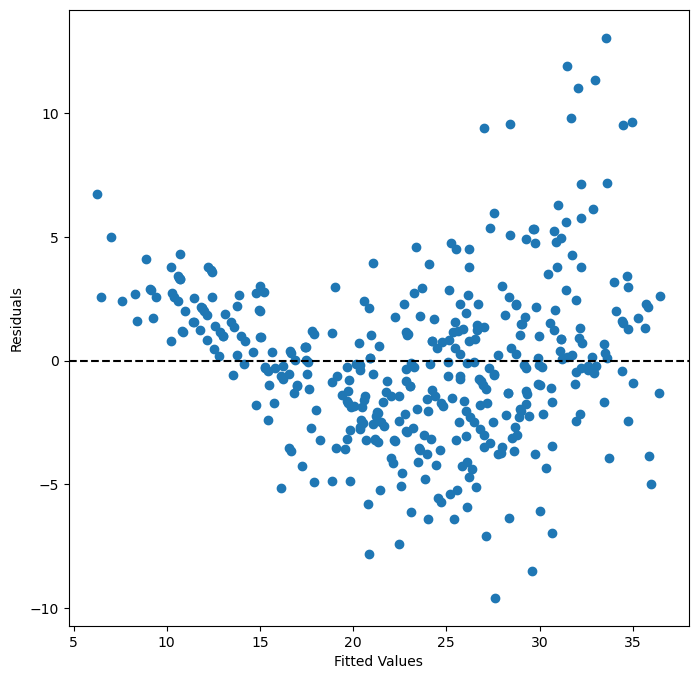

In [54]:
#Lets get the residual plots
#dir(model)
ax = subplots(figsize=(8,8))[1]
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.axhline(0, c = "k", ls= "--")
#yes the residual plot suggests unsual large outliers

Text(0, 0.5, 'Leverage')

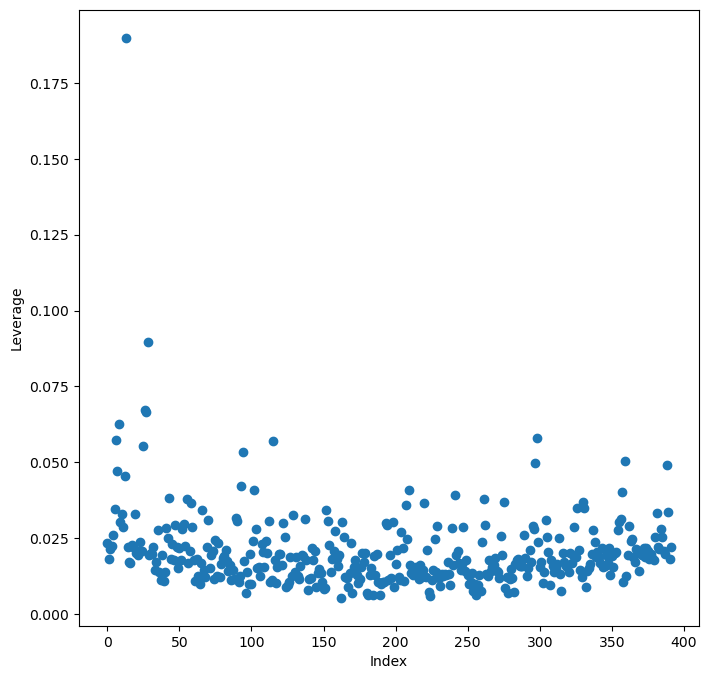

In [57]:
#Lets check on the leverage plot
infl = model.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(Auto_scaled[x_columns].shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")


In [58]:
#Yes, the leverage plot identifies unsual high leverage
np.argmax(infl.hat_matrix_diag) #returns the index(row number) of the observation with the highest leverage in the dataset

13

##### Does high leverage= Outlier? Not always
##### High leverage point is only an outlier if it also has a large residual
#### Cooks distance - combines leverage and residuals to flag influential outliers

In [60]:
residuals = model.resid.iloc[13]
residuals

-4.880153689237183

In [62]:
#compute Cook's Distance
from statsmodels.stats.outliers_influence import OLSInfluence
infl = OLSInfluence(model)
cook_d = infl.cooks_distance[0] # Array of Cook's distances
cook_d.iloc[13] # Check Cook's D for observation 13

0.07780083513977187

C:\Users\colli\AppData\Local\Temp\ipykernel_30108\3668720027.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(infl.hat_matrix_diag[13], model.resid[13], color = "red" , s=100)


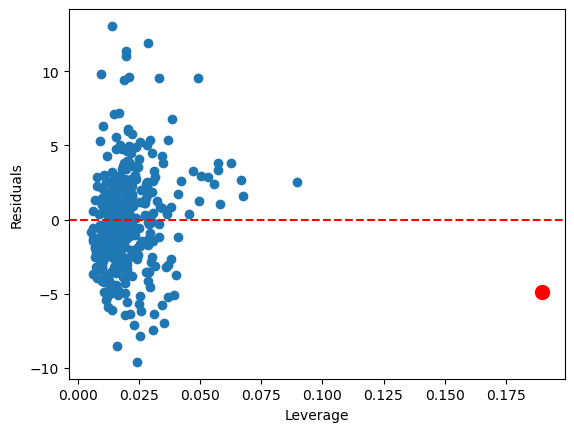

In [69]:
#Lets do a visual inspection (plot leverage vs residuals)
plt.scatter(infl.hat_matrix_diag, model.resid)
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.axhline(y = 0, color= "r", linestyle= "--")
#observation 13
plt.scatter(infl.hat_matrix_diag[13], model.resid[13], color = "red" , s=100)


In [72]:
np.std(model.resid)

3.293551418302203

#### Conclusions
##### The residual is the difference between the actual and the model's predicted value
##### A residual of -4.880 means that the model overpredicted this observation by ~4.88 units
##### Compare this to the SD of the residuals: if the residual is >2-3 SDs, it is usually large(potential outlier)
##### Cooks Distance (0.077) - Measures how much the model changes if this observation is removed.
##### > 0.5: moderately influential, >1.0: Highly influential
##### Why is Cook's D modest despite a large residual?
##### This is because it depends on both leverage and residuals
##### NB: If observation 13 has low leverage, it does not strongly pull the regression line even with a large residual.


In [96]:
# Fit some models with interactions. Do any interactions appear statistically significant
#y= Auto["mpg"]
#allvars=list(Auto.columns.drop("mpg")) + [("acceleration", "origin"),("displacement", "horsepower")]
#X = MS(allvars).fit_transform(Auto)
#model = sm.OLS(y, X)
#results= model.fit()
#summarize(results)

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load data (assuming 'Auto' is a DataFrame)
y = Auto["mpg"]  # Dependent variable

# Define predictors (excluding interaction terms for now)
numeric_vars = [var for var in Auto.columns.drop("mpg") if Auto[var].dtype in ['int64', 'float64']]
categorical_vars = [var for var in Auto.columns.drop("mpg") if var not in numeric_vars]

# Check for duplicate column names
all_columns = numeric_vars + categorical_vars
if len(all_columns) != len(set(all_columns)):
    print("Warning: Duplicate column names detected!")
    # Remove duplicates while preserving order
    seen = set()
    numeric_vars = [x for x in numeric_vars if not (x in seen or seen.add(x))]
    categorical_vars = [x for x in categorical_vars if not (x in seen or seen.add(x))]

# Scale numeric variables
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(Auto[numeric_vars])

# Create DataFrame with scaled numeric variables
Auto_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_vars, index=Auto.index)

# Add categorical variables (if any)
for var in categorical_vars:
    Auto_scaled[var] = Auto[var].values

# Create interaction terms
Auto_scaled["acceleration_origin"] = Auto["acceleration"] * Auto["origin"]
Auto_scaled["displacement_horsepower"] = Auto["displacement"] * Auto["horsepower"]

# Add a constant (intercept) for statsmodels
X_final = sm.add_constant(Auto_scaled)

# Fit OLS model
model = sm.OLS(y, X_final)
results = model.fit()

# Print summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     276.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.74e-161
Time:                        13:21:42   Log-Likelihood:                -965.93
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     382   BIC:                             1992.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

##### Try a few different transformations of the variables, such as log(X), sqrt(X) and X squared. comment on your findings

In [120]:
# log variables
y= Auto["mpg"]
x_columns= Auto.drop("mpg", axis=1)
log_x= np.log(x_columns)
X= MS(log_X).fit_transform(log_x)
model= sm.OLS(y,X)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          6.67e-153
Time:                        19:54:36   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement    -1.0551      1.538     -0.686      0.493      -4.080       1.970
horsepower      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
weight         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
acceleration    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
y= Auto["mpg"]
x_columns= Auto.drop("mpg", axis=1)
sqrt_x= np.sqrt(x_columns)
X= MS(sqrt_x).fit_transform(sqrt_x)
model= sm.OLS(y,X)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.17e-145
Time:                        19:53:54   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -49.7981      9.178     -5.426      0.000     -67.844     -31.752
cylinders       -0.2370      1.538     -0.154      0.878      -3.260       2.786
displacement     0.2258      0.229      0.984      0.326      -0.225       0.677
horsepower      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
weight          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
acceleration    -0.8253      0.834     -0.989      0.323      -2.466       0.815
year            12.7903      0.859     14.891      0.000      11.102      14.479
origin           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
y= Auto["mpg"]
x_columns= Auto.drop("mpg", axis=1)
sq_x= np.square(x_columns)
X= MS(sq_x).fit_transform(sq_x)
model= sm.OLS(y,X)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          3.57e-129
Time:                        19:45:16   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2080      2.356      0.513      0.608      -3.424       5.840
cylinders       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
acceleration     0.0063      0.003      2.334      0.020       0.001       0.012
year             0.0050      0.000     14.160      0.000       0.004       0.006
origin           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The log-trasnformed model reveals strong non linear effects fpr horsepower and weight but other variables e.g displacement lose significance
* Refine by dropping insignificant terms
* Ensure proper handling of categorical varables
* consider plotting partial regression effects for key variables

In [122]:
#drop log(cylinders) and log(displacement) (p>0.05)
#refit with only significant terms
X_log_refined= Auto[["horsepower", "weight", "acceleration", "year", "origin"]].apply(np.log)
#fix categorical encoding
X_origin = pd.get_dummies(Auto["origin"], prefix= "origin", drop_first= True)
X_final= pd.concat([X_log_refined.drop("origin", axis=1), X_origin], axis=1)
X= MS(X_final).fit_transform(X_final)
model= sm.OLS(y,X)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     358.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          3.98e-154
Time:                        20:11:43   Log-Likelihood:                -991.87
No. Observations:                 392   AIC:                             1998.
Df Residuals:                     385   BIC:                             2026.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -68.7243     17.384     -3.953      0.000    -102.903     -34.546
horsepower      -6.8121      1.572     -4.334      0.000      -9.902      -3.722
weight         -12.9870      1.563     -8.310      0.000     -16.060      -9.914
acceleration    -4.8548      1.533     -3.166      0.002      -7.869      -1.840
year            55.3020      3.584     15.430      0.000      48.255      62.349
origin_2         1.4435      0.481      3.002      0.003       0.498       2.389
origin_3         1.7955      0.495      3.627      0.000       0.822       2.769
==============================================================================
Omnibus:                       39.702   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.546
Skew:                           0.577   Prob(JB):                     8.79e-18
Kurtosis:                       4.865   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#Diagnose negative intercept
X_log_centered = X_log_refined - X_log_refined.mean()
X_log_centered

#X_final = sm.add_constant(X_log_centered)  # Add intercept
#model = sm.OLS(y, X_final).fit()
#positive values means that the observations are above the mean

,horsepower,weight,acceleration,year,origin
name,,,,,
chevrolet chevelle malibu,0.279603,0.202481,-0.242583,-0.080795,-0.341644
buick skylark 320,0.518014,0.255014,-0.285142,-0.080795,-0.341644
plymouth satellite,0.422704,0.182883,-0.329594,-0.080795,-0.341644
amc rebel sst,0.422704,0.182010,-0.242583,-0.080795,-0.341644
ford torino,0.353711,0.186660,-0.376114,-0.080795,-0.341644
...,...,...,...,...,...
ford mustang gl,-0.133584,-0.025383,0.019782,0.077429,-0.341644
vw pickup,-0.636688,-0.295303,0.475257,0.077429,0.351503
dodge rampage,-0.157115,-0.220692,-0.276484,0.077429,-0.341644


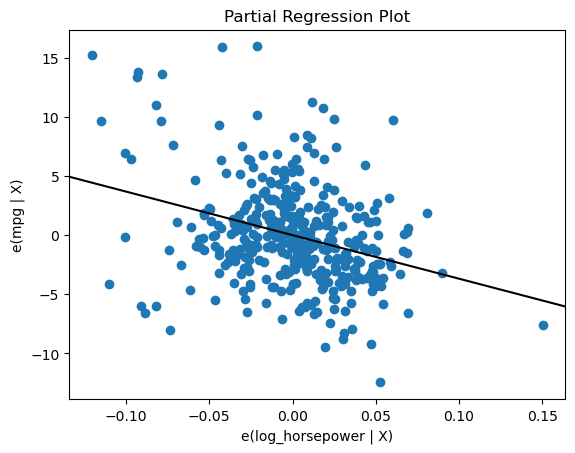

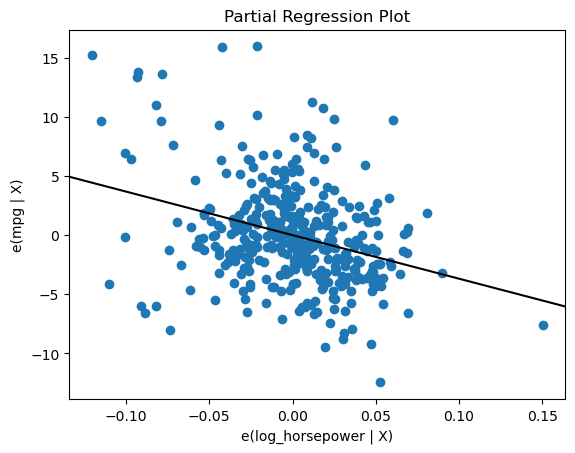

In [128]:
#Partial regeression plots for log(horsepower) and log(weight) to validate nonlinearity
# First, create the log-transformed columns if they don't exist already
#X_final['log_horsepower'] = np.log(X_final['horsepower'])
#X_final['log_weight'] = np.log(X_final['weight'])
mpg=Auto["mpg"]
log_horsepower = X_final["horsepower"]
log_weight = X_final["weight"]
# Now create the partial regression plots using the actual column names
fig = sm.graphics.plot_partregress("mpg", "log_horsepower", "log_weight", 
                                  data=X_final, obs_labels=False)
fig

#### Conclusions
##### Horsepower and Weight:

##### Strong negative coefficients in the log-model (-6.97 and -12.57) imply that vehicles above the mean in these variables (positive values in X_log_centered) will have lower mpg.

##### Example: The Buick Skylark (horsepower=0.518, weight=0.255) is predicted to have much worse fuel efficiency than the VW Pickup (horsepower=-0.637, weight=-0.295).

In [131]:
np.exp(-66.56) 

1.2398218461399958e-29